# Intuitions on Convolutions

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

## The dataset

In [2]:
def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    X, y = [], []
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)   
    return np.array(X), np.array(y)
        
X, y = load_data("data")
# Replace data by "https://wagon-public-datasets.s3.amazonaws.com/deep-learning-circles-triangles/" 
# if you are on a server

In [3]:
print(len(X), len(y))

200 200


In [4]:
print(X.shape, y.shape)

(200, 76, 78, 1) (200,)


👀 Let's have a look at some images with `plt.imshow` and show their respective labels.

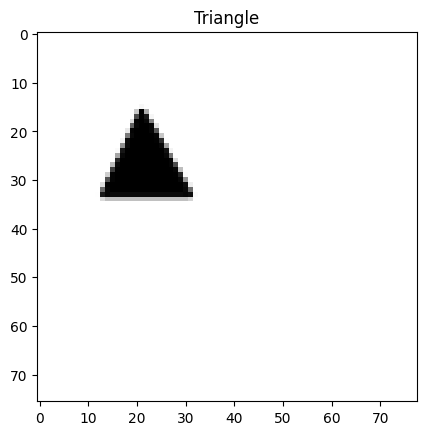

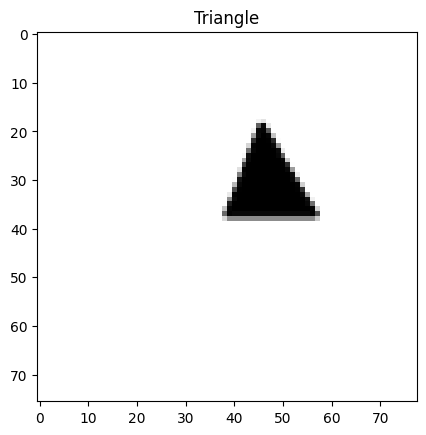

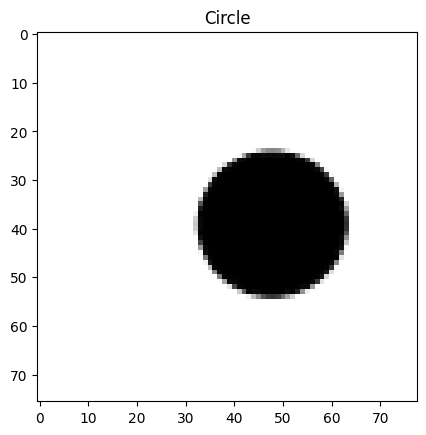

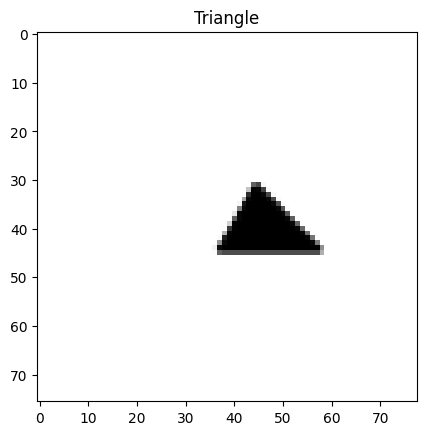

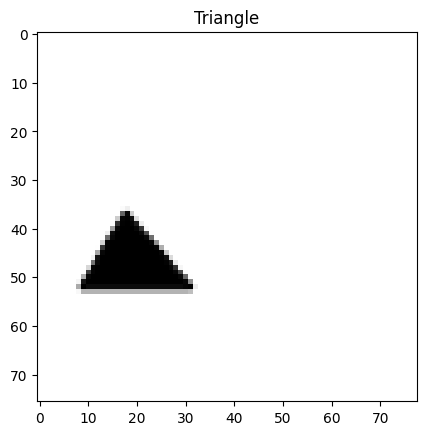

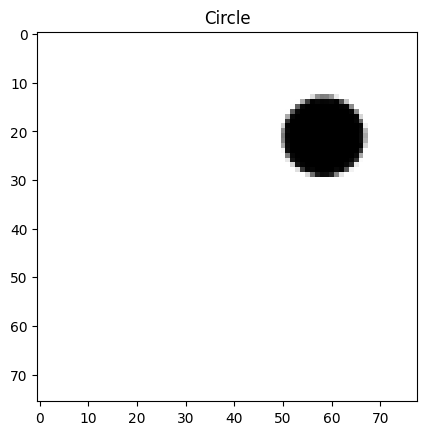

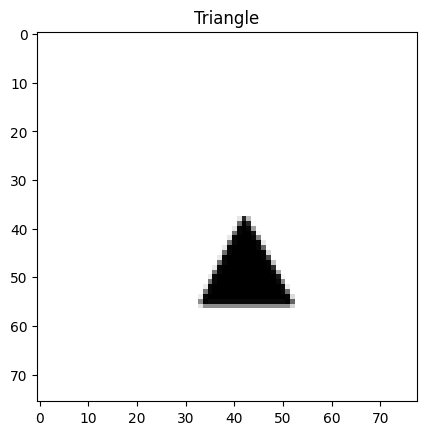

In [5]:
for iter_, (image, label) in enumerate(zip(X, y)):
    plt.imshow(image[:, :, 0], cmap='gray')
    plt.title('Triangle' if label == 1 else 'Circle')
    plt.show()   
    if iter_ > 5:
        break

❓ **Question: How many classes are we going to predict** ❓

_This information will help you design the last layer of your Convolutional Network_

## (1) Kernels & Convolutions

In [6]:
def compute_convolution(input_image, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape
    img = np.squeeze(input_image) # Removes dimensions of size 1
    img_height, img_width = img.shape
    output_image = []

    for x in range(img_height - kernel_height + 1):
        arr = []
        for y in range(img_width - kernel_width + 1): 
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
        output_image.append(arr)
        
    return output_image

In [7]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

In [8]:
compute_convolution(X[121], identity_kernel)

[[1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

In [9]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

In [10]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

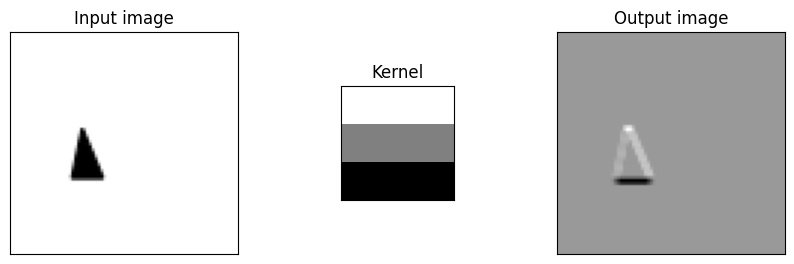

In [11]:
plot_convolution(X[121], kernel_1)

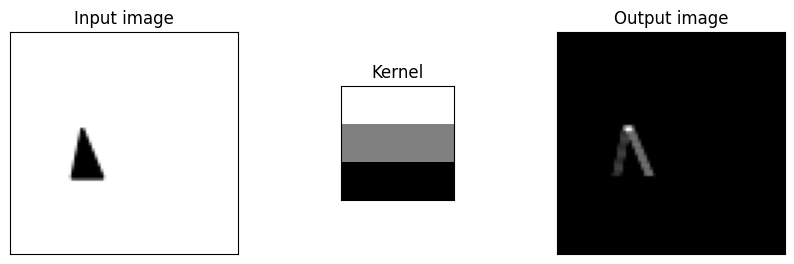

In [12]:
plot_convolution(X[121], kernel_1, activation=True)

👆 This kernel is actually highlighting the edges in a given direction. 

In [13]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

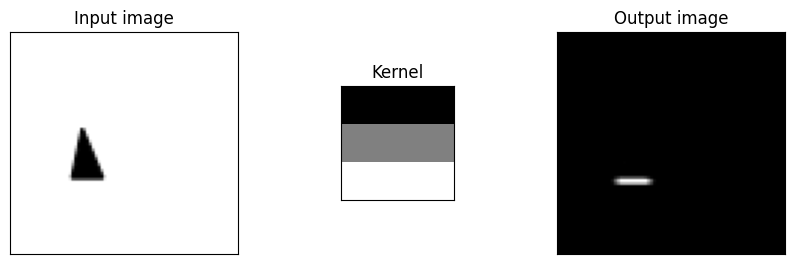

In [14]:
plot_convolution(X[121], kernel_2 ,activation=True)

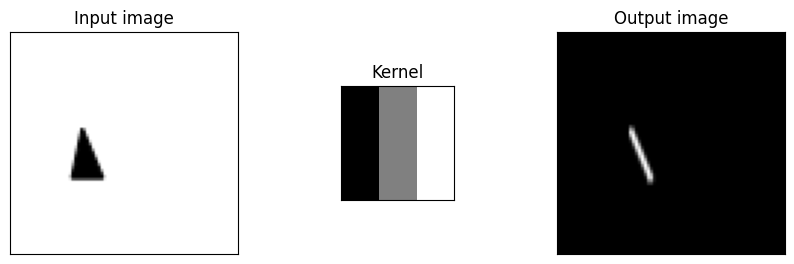

In [15]:
plot_convolution(X[121], kernel_3 ,activation=True)

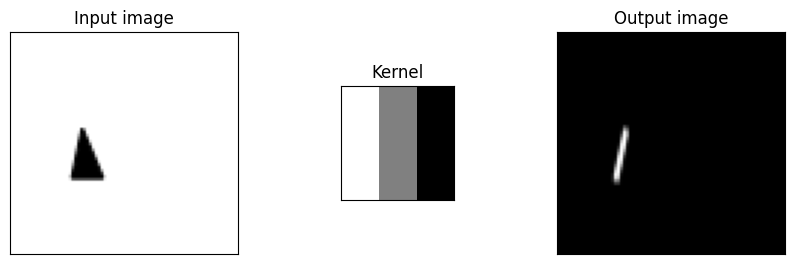

In [16]:
plot_convolution(X[121], kernel_4 ,activation=True)

In [17]:
kernel_big = np.array([
    np.ones((10,)),
    np.ones((10,)),
    np.ones((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.ones((10,))*-1,
    np.ones((10,))*-1,
    np.ones((10,))*-1,
])

kernel_big

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

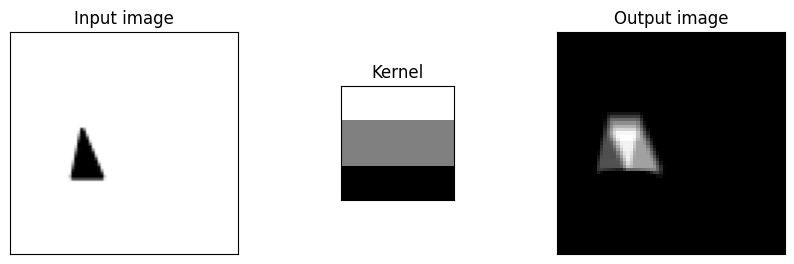

In [18]:
plot_convolution(X[121],kernel_big,activation=True)

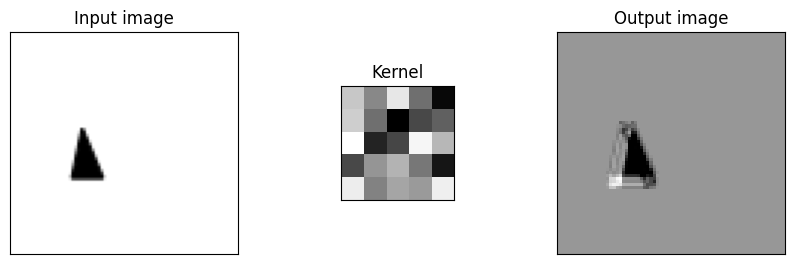

In [19]:
random_kernel = np.random.uniform(-10, 10, (5, 5))
plot_convolution(X[121],random_kernel,activation=True)

Now that you've got the idea of what a convolution operation does to an image, let's see how it goes with a "real" Convolutional Neural Network. ✅

### (2.1) Architecture

In [20]:
def initialize_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, kernel_size=(4, 4), activation='relu', input_shape=(76, 78, 1)))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        loss="binary_crossentropy",
        optimizer='adam',
        metrics=["accuracy"]
    )     
    
    return model

### (2.2) Training

In [21]:
model = initialize_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 37, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0

In [23]:
es = EarlyStopping(
    patience=20,
    restore_best_weights=True,
    min_delta =0.01
)

history = model.fit(
    X, y, 
    batch_size=16, 
    epochs=66, 
    validation_split=0.3,
    callbacks=[es],
    verbose = 1
)

Epoch 1/66


9/9 [==============================] - 5s 119ms/step - loss: 0.6974 - accuracy: 0.4929 - val_loss: 0.6780 - val_accuracy: 0.7500
Epoch 2/66
9/9 [==============================] - 0s 48ms/step - loss: 0.6627 - accuracy: 0.7571 - val_loss: 0.6119 - val_accuracy: 0.8667
Epoch 3/66
9/9 [==============================] - 0s 48ms/step - loss: 0.5847 - accuracy: 0.8286 - val_loss: 0.4566 - val_accuracy: 0.8167
Epoch 4/66
9/9 [==============================] - 0s 44ms/step - loss: 0.4113 - accuracy: 0.8857 - val_loss: 0.2783 - val_accuracy: 0.9333
Epoch 5/66
9/9 [==============================] - 0s 39ms/step - loss: 0.2736 - accuracy: 0.8857 - val_loss: 0.1964 - val_accuracy: 0.9167
Epoch 6/66
9/9 [==============================] - 0s 41ms/step - loss: 0.1790 - accuracy: 0.9286 - val_loss: 0.0880 - val_accuracy: 1.0000
Epoch 7/66
9/9 [==============================] - 0s 40ms/step - loss: 0.0972 - accuracy: 0.9714 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 8/66
9/9 [========

In [24]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

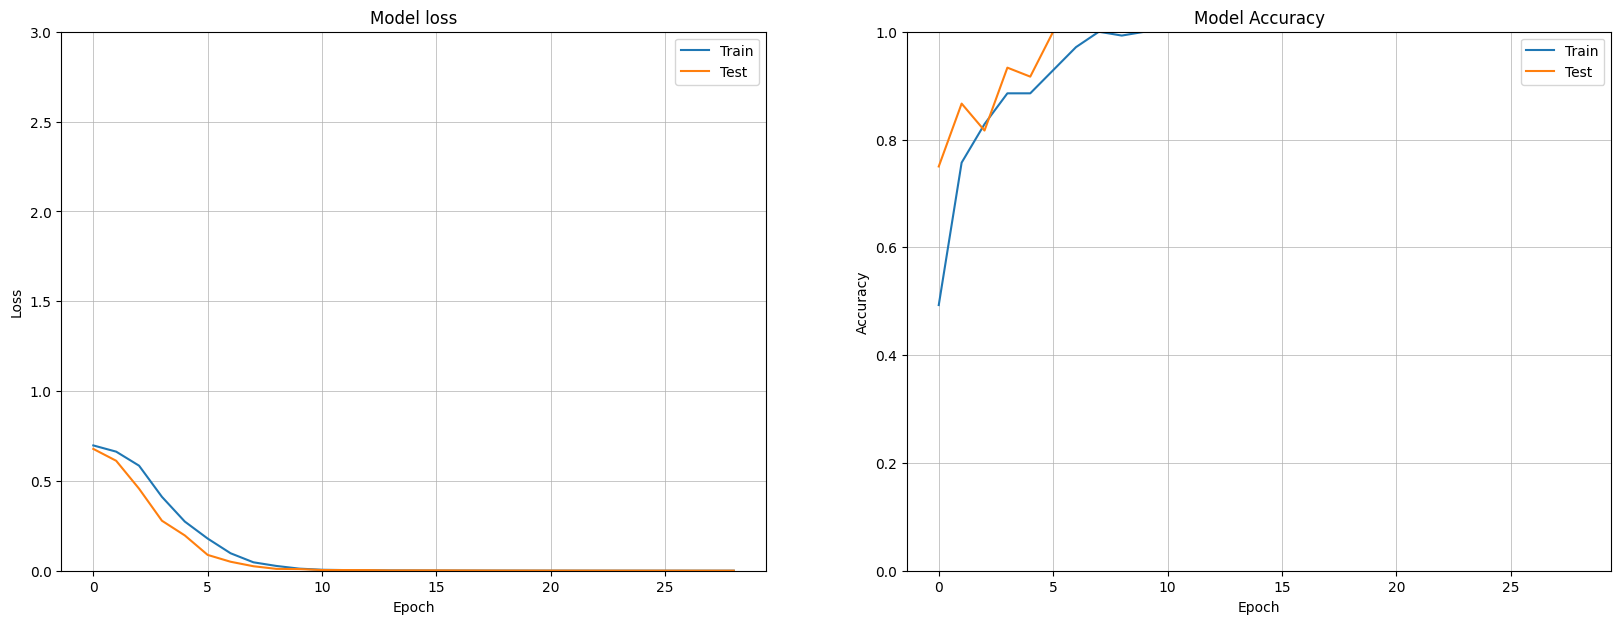

In [25]:
plot_loss_accuracy(history)

### 🎁 📚 (2.3) Deeper understanding of CNNs

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 37, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0

In [27]:
model.layers

#### (2.3.1) Kernels

In [28]:
first_convolutional_layer = model.layers[0]
first_convolutional_layer

In [29]:
# Weights of the first convolutional layer of the CNN - which was trained/optimized
first_convolutional_layer.weights[0].shape

TensorShape([4, 4, 1, 16])

In [30]:
# Biases of the first convolutional layer of the CNN - which was trained/optimized
first_convolutional_layer.weights[1].shape

TensorShape([16])

👆 Let's not forget the biases, one per new channel in the output image!

In [31]:
# Notice that we have indeed 256 weights + 16 biases = 272 parameters for the first convolutional layer
4*4*1*16+16

272

In [32]:
second_convolutional_layer = model.layers[2]
second_convolutional_layer

In [33]:
# Weights of the second convolutional layer of the CNN - which was trained/optimized
second_convolutional_layer.weights[0].shape

TensorShape([3, 3, 16, 32])

In [34]:
# Biases of the second convolutional layer of the CNN - which was trained/optimized
second_convolutional_layer.weights[1].shape

TensorShape([32])

In [35]:
# Notice that we have indeed 4608 weights + 32 biases = 4640 parameters for the third convolutional layer
3*3*16*32+32

4640

In [36]:
# Accessing the third convolutional layer of the CNN
third_convolutional_layer = model.layers[4]
third_convolutional_layer

In [37]:
# Weights of the third convolutional layer of the CNN - which was trained/optimized
third_convolutional_layer.weights[0].shape

TensorShape([3, 3, 32, 64])

In [38]:
# Biases of the third convolutional layer of the CNN - which was trained/optimized
third_convolutional_layer.weights[1].shape

TensorShape([64])

In [39]:
# Notice that we have indeed 18432 weights + 64 biases = 18496 parameters for the fourth convolutional layer
3*3*32*64+64

18496

In [40]:
# Accessing the fourth convolutional layer of the CNN
fourth_convolutional_layer = model.layers[6]
fourth_convolutional_layer

In [41]:
# Weights of the fourth convolutional layer of the CNN - which was trained/optimized
fourth_convolutional_layer.weights[0].shape

TensorShape([2, 2, 64, 64])

In [42]:
# Biases of the fourth convolutional layer of the CNN - which was trained/optimized
fourth_convolutional_layer.weights[1].shape

TensorShape([64])

In [43]:
# Notice that we have indeed 16384 weights + 64 biases = 16448 parameters for the fourth convolutional layer
(2*2*64+1)*64

16448

In [44]:
first_convolutional_layer.kernel

<tf.Variable 'conv2d/kernel:0' shape=(4, 4, 1, 16) dtype=float32, numpy=
array([[[[ 0.07911664,  0.03066465,  0.12899561,  0.12991054,
           0.07376666, -0.07091461, -0.07376634,  0.06543926,
           0.11673839,  0.03173674,  0.12919648,  0.08681547,
          -0.03304883, -0.09556217,  0.06359562, -0.16171487]],

        [[-0.01247074, -0.07201237,  0.06129109, -0.0632202 ,
           0.0911122 ,  0.06104607, -0.14687817, -0.06991526,
          -0.07491351,  0.05731238,  0.18102215, -0.00444876,
           0.12200291,  0.04361502,  0.15805782, -0.06405247]],

        [[ 0.03691144, -0.00072544, -0.06604818,  0.07097521,
          -0.0525097 , -0.13306575, -0.11639672, -0.12017407,
           0.02304935, -0.10617442,  0.17085627, -0.13066453,
           0.03314831,  0.11496399,  0.00747055, -0.06265226]],

        [[-0.03399003, -0.1212723 ,  0.13291469, -0.08871493,
          -0.08555411, -0.09155737,  0.08488052,  0.06821835,
           0.10235396,  0.08435513, -0.03585098,  

tf.Tensor(
[[ 0.07911664  0.03066465  0.12899561  0.12991054  0.07376666 -0.07091461
  -0.07376634  0.06543926  0.11673839  0.03173674  0.12919648  0.08681547
  -0.03304883 -0.09556217  0.06359562 -0.16171487]], shape=(1, 16), dtype=float32)


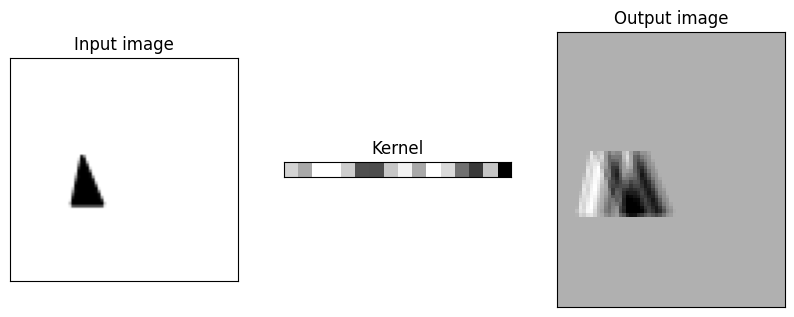

tf.Tensor(
[[-0.01247074 -0.07201237  0.06129109 -0.0632202   0.0911122   0.06104607
  -0.14687817 -0.06991526 -0.07491351  0.05731238  0.18102215 -0.00444876
   0.12200291  0.04361502  0.15805782 -0.06405247]], shape=(1, 16), dtype=float32)


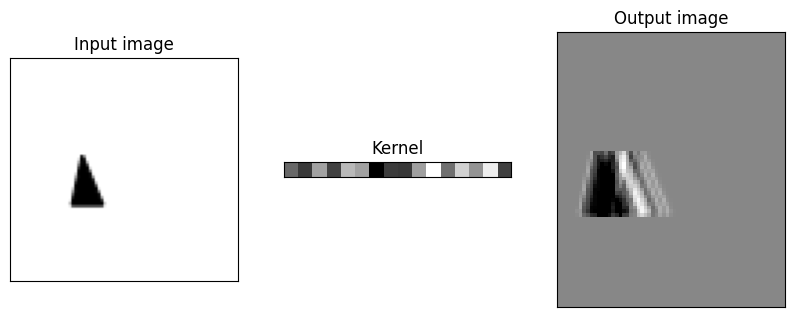

tf.Tensor(
[[ 0.03691144 -0.00072544 -0.06604818  0.07097521 -0.0525097  -0.13306575
  -0.11639672 -0.12017407  0.02304935 -0.10617442  0.17085627 -0.13066453
   0.03314831  0.11496399  0.00747055 -0.06265226]], shape=(1, 16), dtype=float32)


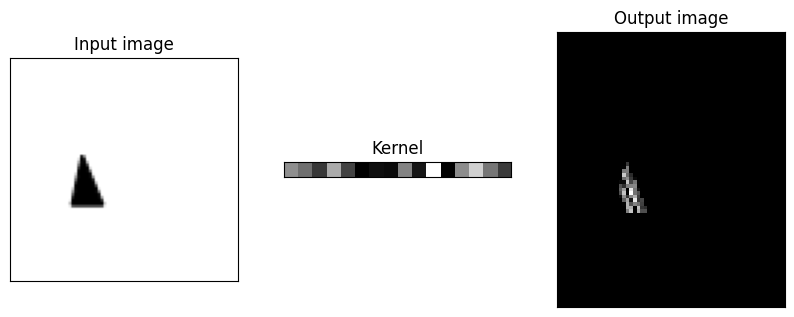

tf.Tensor(
[[-0.03399003 -0.1212723   0.13291469 -0.08871493 -0.08555411 -0.09155737
   0.08488052  0.06821835  0.10235396  0.08435513 -0.03585098  0.00220298
   0.11396375 -0.09091526 -0.03001583  0.05515415]], shape=(1, 16), dtype=float32)


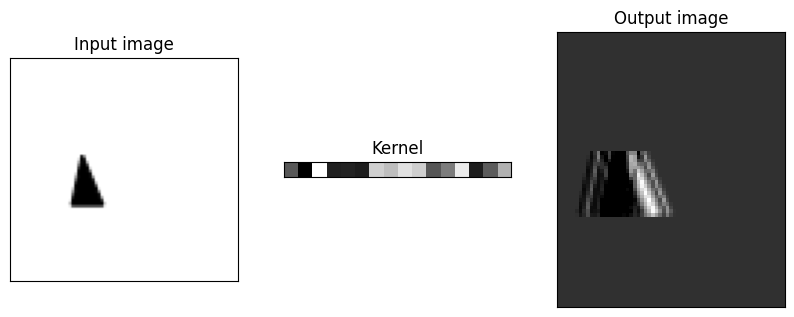

In [45]:
for kernel in first_convolutional_layer.kernel[0]:
    print(kernel)
    plot_convolution(X[121], kernel, activation=True)

#### (2.3.2) Activations 🧨

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 37, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0

In [47]:
layers_outputs = [layer.output for layer in model.layers]
layers_outputs

[<KerasTensor: shape=(None, 73, 75, 16) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 36, 37, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 34, 35, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 17, 17, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 15, 15, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 6, 6, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 576) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]

In [48]:
activation_models = [Model(inputs=model.input, outputs=output) for output in layers_outputs]

In [49]:
activations = [m.predict(X) for m in activation_models]
len(activations)

7/7 [==============================] - 0s 16ms/step


11

In [50]:
[activation.shape for activation in activations]

[(200, 73, 75, 16),
 (200, 36, 37, 16),
 (200, 34, 35, 32),
 (200, 17, 17, 32),
 (200, 15, 15, 64),
 (200, 7, 7, 64),
 (200, 6, 6, 64),
 (200, 3, 3, 64),
 (200, 576),
 (200, 10),
 (200, 1)]

In [51]:
layers_outputs = [layer.output for layer in model.layers] # same as above
activation_model = Model(inputs=model.input, outputs=layers_outputs) # model with many outputs !
activations = activation_model.predict(X) # 11 predictions at once!
[activation.shape for activation in activations]

7/7 [==============================] - 0s 16ms/step


[(200, 73, 75, 16),
 (200, 36, 37, 16),
 (200, 34, 35, 32),
 (200, 17, 17, 32),
 (200, 15, 15, 64),
 (200, 7, 7, 64),
 (200, 6, 6, 64),
 (200, 3, 3, 64),
 (200, 576),
 (200, 10),
 (200, 1)]

#### (2.3.3) The final show 🥁

--- Observing the effect of the convolutional layer number 0... ---

16 kernels were applied and here are all the activations of this Conv2D Layer:


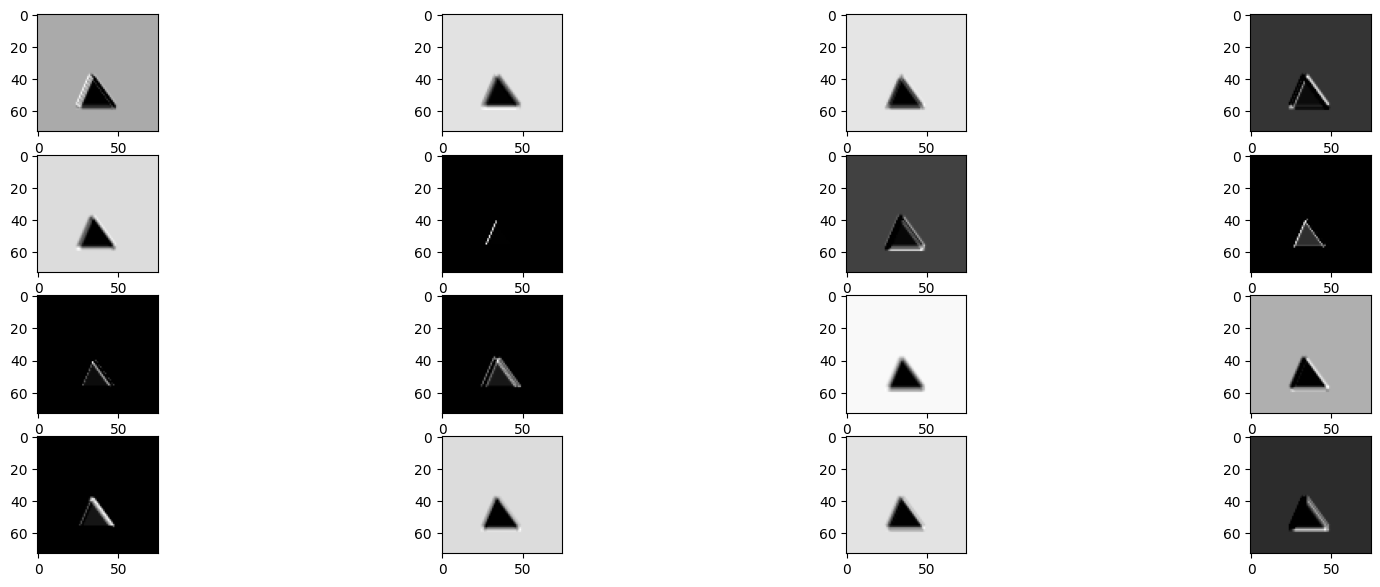

--- Observing the effect of the convolutional layer number 2... ---

32 kernels were applied and here are all the activations of this Conv2D Layer:


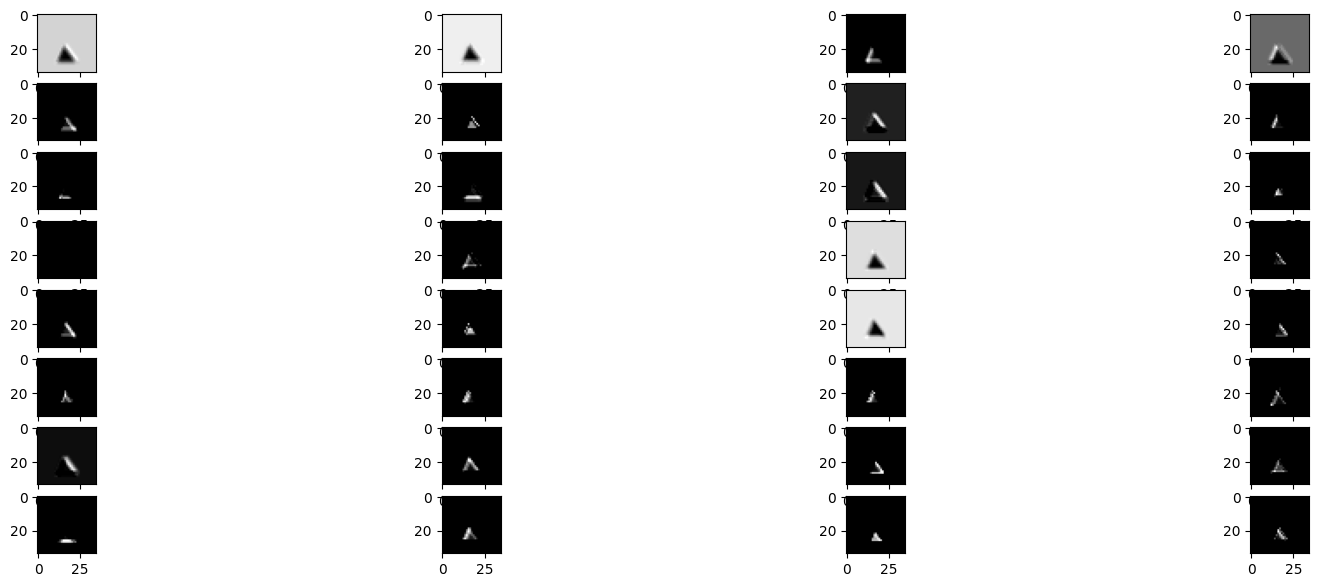

--- Observing the effect of the convolutional layer number 4... ---

64 kernels were applied and here are all the activations of this Conv2D Layer:


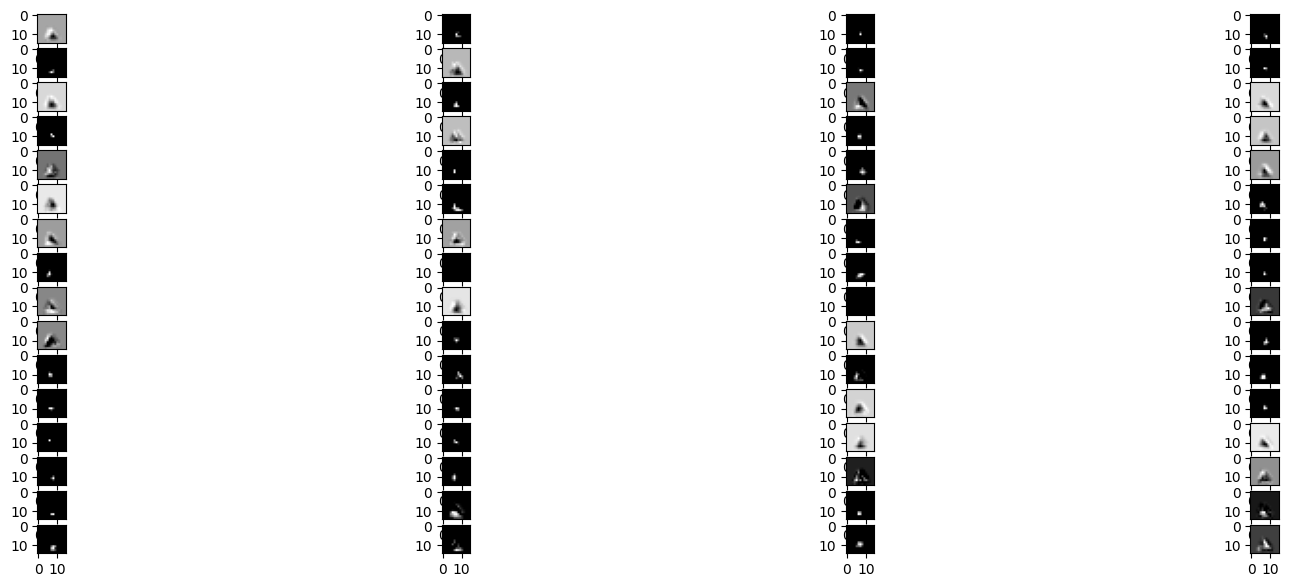

--- Observing the effect of the convolutional layer number 6... ---

64 kernels were applied and here are all the activations of this Conv2D Layer:


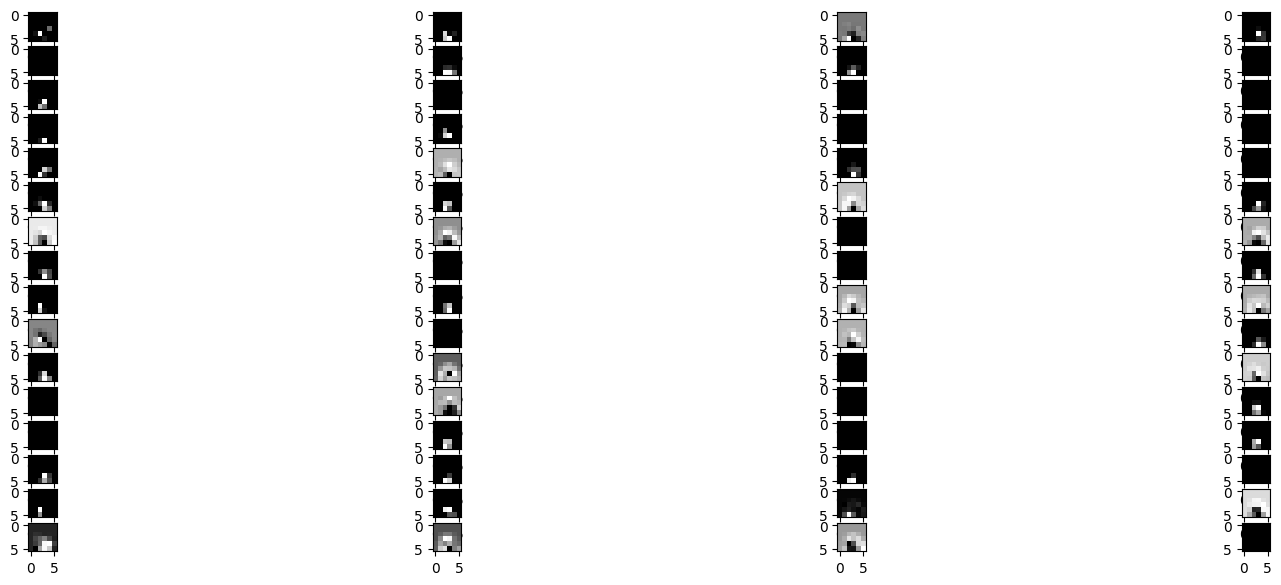

In [52]:
# Selecting a random triangle
image_number = np.random.choice(np.where(y == 1)[0]) 

for layer_number in [0,2,4,6]:
    
    print(f"--- Observing the effect of the convolutional layer number {layer_number}... ---")
    print("")
    
    temp_number_kernels = model.layers[layer_number].weights[0].shape[-1]
    print(f"{temp_number_kernels} kernels were applied and here are all the activations of this Conv2D Layer:")
    
    fig, axes = plt.subplots(int(temp_number_kernels/4),4, figsize=(20,7))
    
    
    for ax, kernel_number in zip(axes.flat,range(temp_number_kernels)):
        activation = activations[layer_number][image_number][:, :, kernel_number]
        ax.imshow(activation, cmap="gray")
    
    plt.show()


--- Observing the effect of the convolutional layer number 0... ---

16 kernels were applied and here are all the activations of this Conv2D Layer:


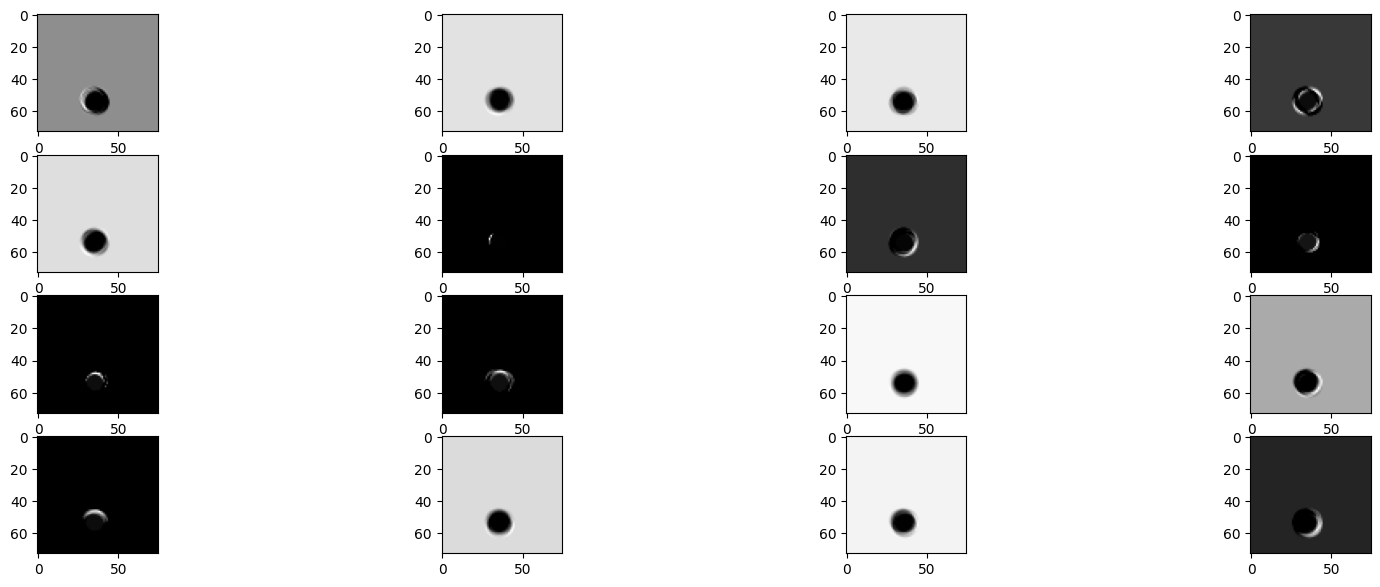

--- Observing the effect of the convolutional layer number 2... ---

32 kernels were applied and here are all the activations of this Conv2D Layer:


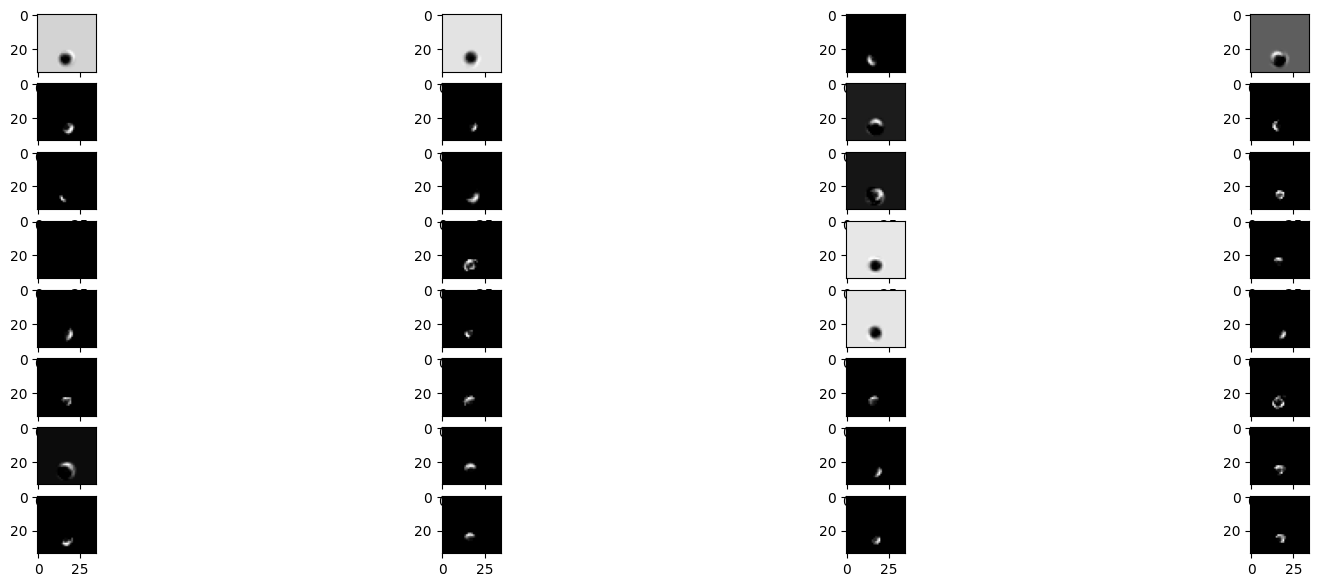

--- Observing the effect of the convolutional layer number 4... ---

64 kernels were applied and here are all the activations of this Conv2D Layer:


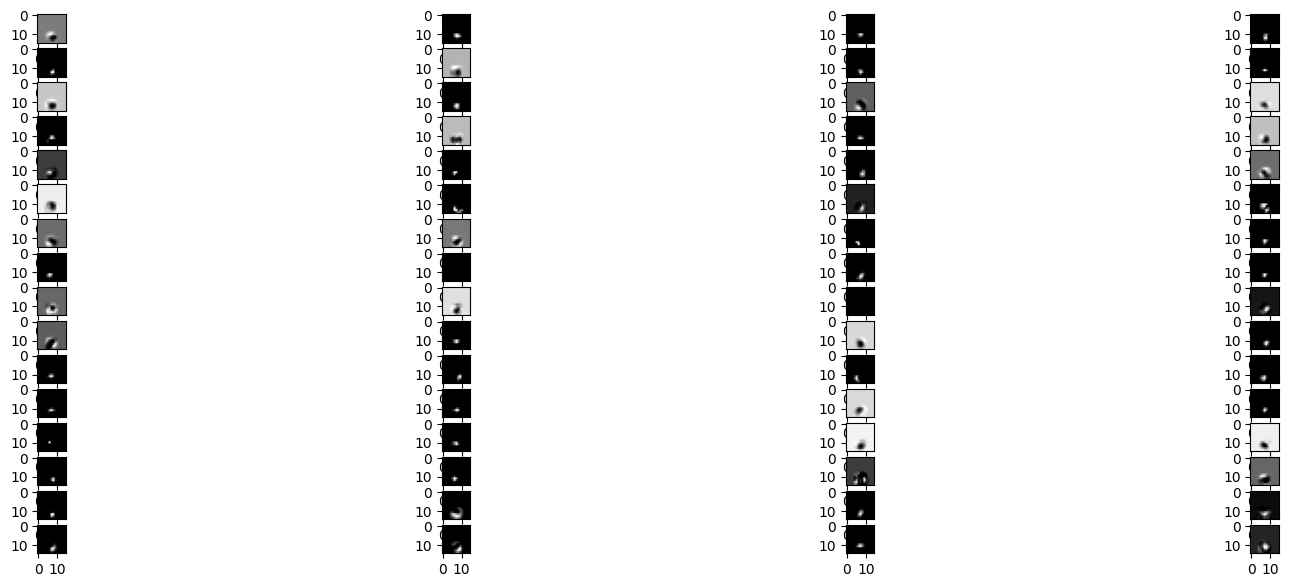

--- Observing the effect of the convolutional layer number 6... ---

64 kernels were applied and here are all the activations of this Conv2D Layer:


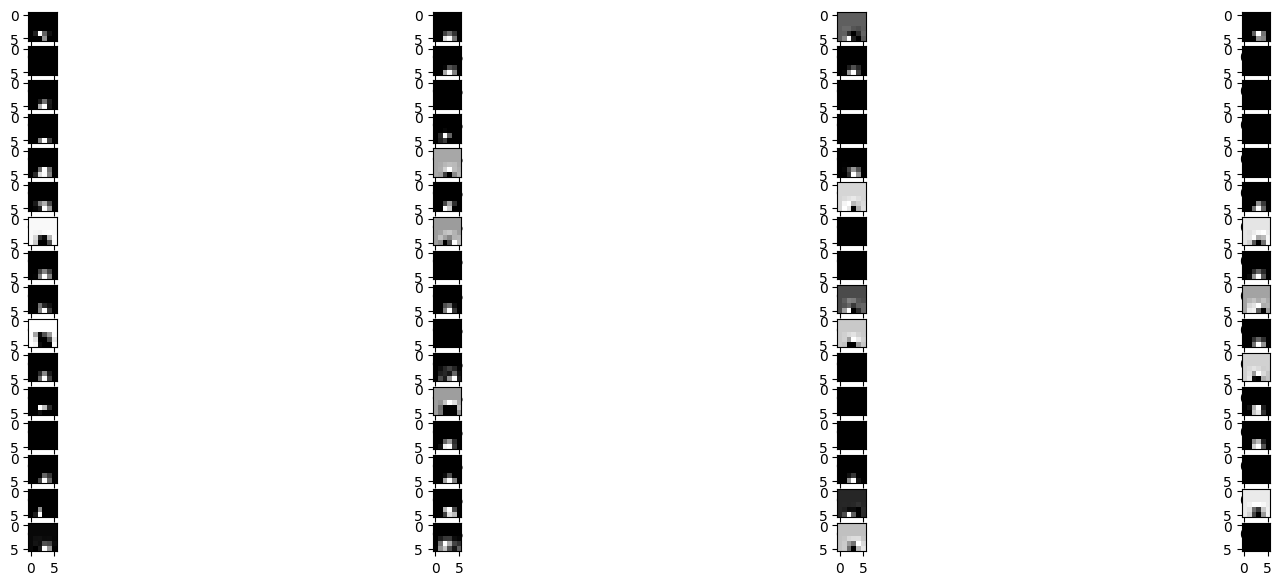

In [53]:
# Selecting a random triangle
image_number = np.random.choice(np.where(y == 0)[0]) 

for layer_number in [0,2,4,6]:
    
    print(f"--- Observing the effect of the convolutional layer number {layer_number}... ---")
    print("")
    
    temp_number_kernels = model.layers[layer_number].weights[0].shape[-1]
    print(f"{temp_number_kernels} kernels were applied and here are all the activations of this Conv2D Layer:")
    
    fig, axes = plt.subplots(int(temp_number_kernels/4),4, figsize=(20,7))
    
    
    for ax, kernel_number in zip(axes.flat,range(temp_number_kernels)):
        activation = activations[layer_number][image_number][:, :, kernel_number]
        ax.imshow(activation, cmap="gray")
    
    plt.show()